# Análisis Exploratorio de Datos / Exploratory Data Analysis (EDA) + PCA

Referencias:
- https://en.wikipedia.org/wiki/Exploratory_data_analysis
- https://datos.gob.es/es/conocimiento/guia-practica-de-introduccion-al-analisis-exploratorio-de-datos-en-r
- https://en.wikipedia.org/wiki/Principal_component_analysis
- https://www.kaggle.com/code/ryanholbrook/principal-component-analysis
- https://arxiv.org/pdf/1404.1100
  

## Methodology

1. Understand the problem and the context (before *Python*)!
 - **Objective**: prediction, classification, clustering, anomaly detection, etc.
 - **Target Variable**: Continua, categorical, none (unsupervised)
 - **Unit of analysis**: event, time, node, user, ...
 - **Domain assumptions**: ranges, relathionships, logical constraintst, ...

2. Initial dataset inspection
 - Format, first rows, features
 - Types
 - Shapes
 - Features: numerical, categorical, temporal, identifiers
! Model selection, encoding requirements, time modelling

3. Data quality assessment
 - 3.1. Missing values: percentage of missing values per feature, 
   + Drop rows? Infere values? Carry on...?
   ! Handle missing values, bias
 - 3.2. Duplicates and consistency
   ! Overfitting
 - 3.3 Outliers: visual and statistical methods
   ! Models sensitive 


4. Univariate analysis
   - Numerical variables: Distribution, Mean vs Median, Skewness and heavy tails
   - Categorical variables: cardinality, **dominant classes**, rare categories
  ! Normalization, Transformation (log), Category Grouping

5. Bivariate analysis
   - **Target variable** and relationships
     - Correlation != Causation
     - Non-linear relationships
   - Exploration with PCA: Analisis de Componentes Principales / Principal Component Analysis
  !Feature selection, linear vs non-linear models

## PCA 

- View of high-dimensional data
- Orthogonal directions of maximun variance
- Raking them by explained variance

Only: 
- In numerical data
- Sensitive to scale (normalize) -> remove outliers?

... let's see an example

# Wine Dataset


## EDA

In [131]:
from sklearn.datasets import load_wine
data = load_wine()
print(dir(data))


['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


In [132]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [133]:
print(data.target)
print("-"*100)
print(data.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
----------------------------------------------------------------------------------------------------
['class_0' 'class_1' 'class_2']


>> 1 Understand the problem and the context (before *Python*)!
 - **Objective**: prediction, classification, clustering, anomaly detection, etc.
 - **Target Variable**: Continua, categorical, none (unsupervised)
 - **Unit of analysis**: event, time, node, user, ...
 - **Domain assumptions**: ranges, relathionships, logical constraintst, ...

In [134]:
import pandas as pd

df = pd.DataFrame(data.data, columns=data.feature_names)

In [135]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [136]:
df.describe() #type, range,

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


>> Domain assumptions: ranges, relathionships, logical constraintst, !!


>> 2. Initial dataset inspection
 - Format, first rows, features
 - Types
 - Shapes
 - Features: numerical, categorical, temporal, identifiers
! Model selection, encoding requirements, time modelling
>> 3. Data quality assessment
 - 3.1. Missing values: percentage of missing values per feature, 
   + Drop rows? Infere values? Carry on...?
   ! Handle missing values, bias
 - 3.2. Duplicates and consistency
   ! Overfitting
 - 3.3 Outliers: visual and statistical methods
   ! Models sensitive 

In [137]:
df.info() # dtype, missing values,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [138]:
df.isnull().sum() # count missing values


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [139]:
df.duplicated().sum() # count duplicates > not overfiting

np.int64(0)

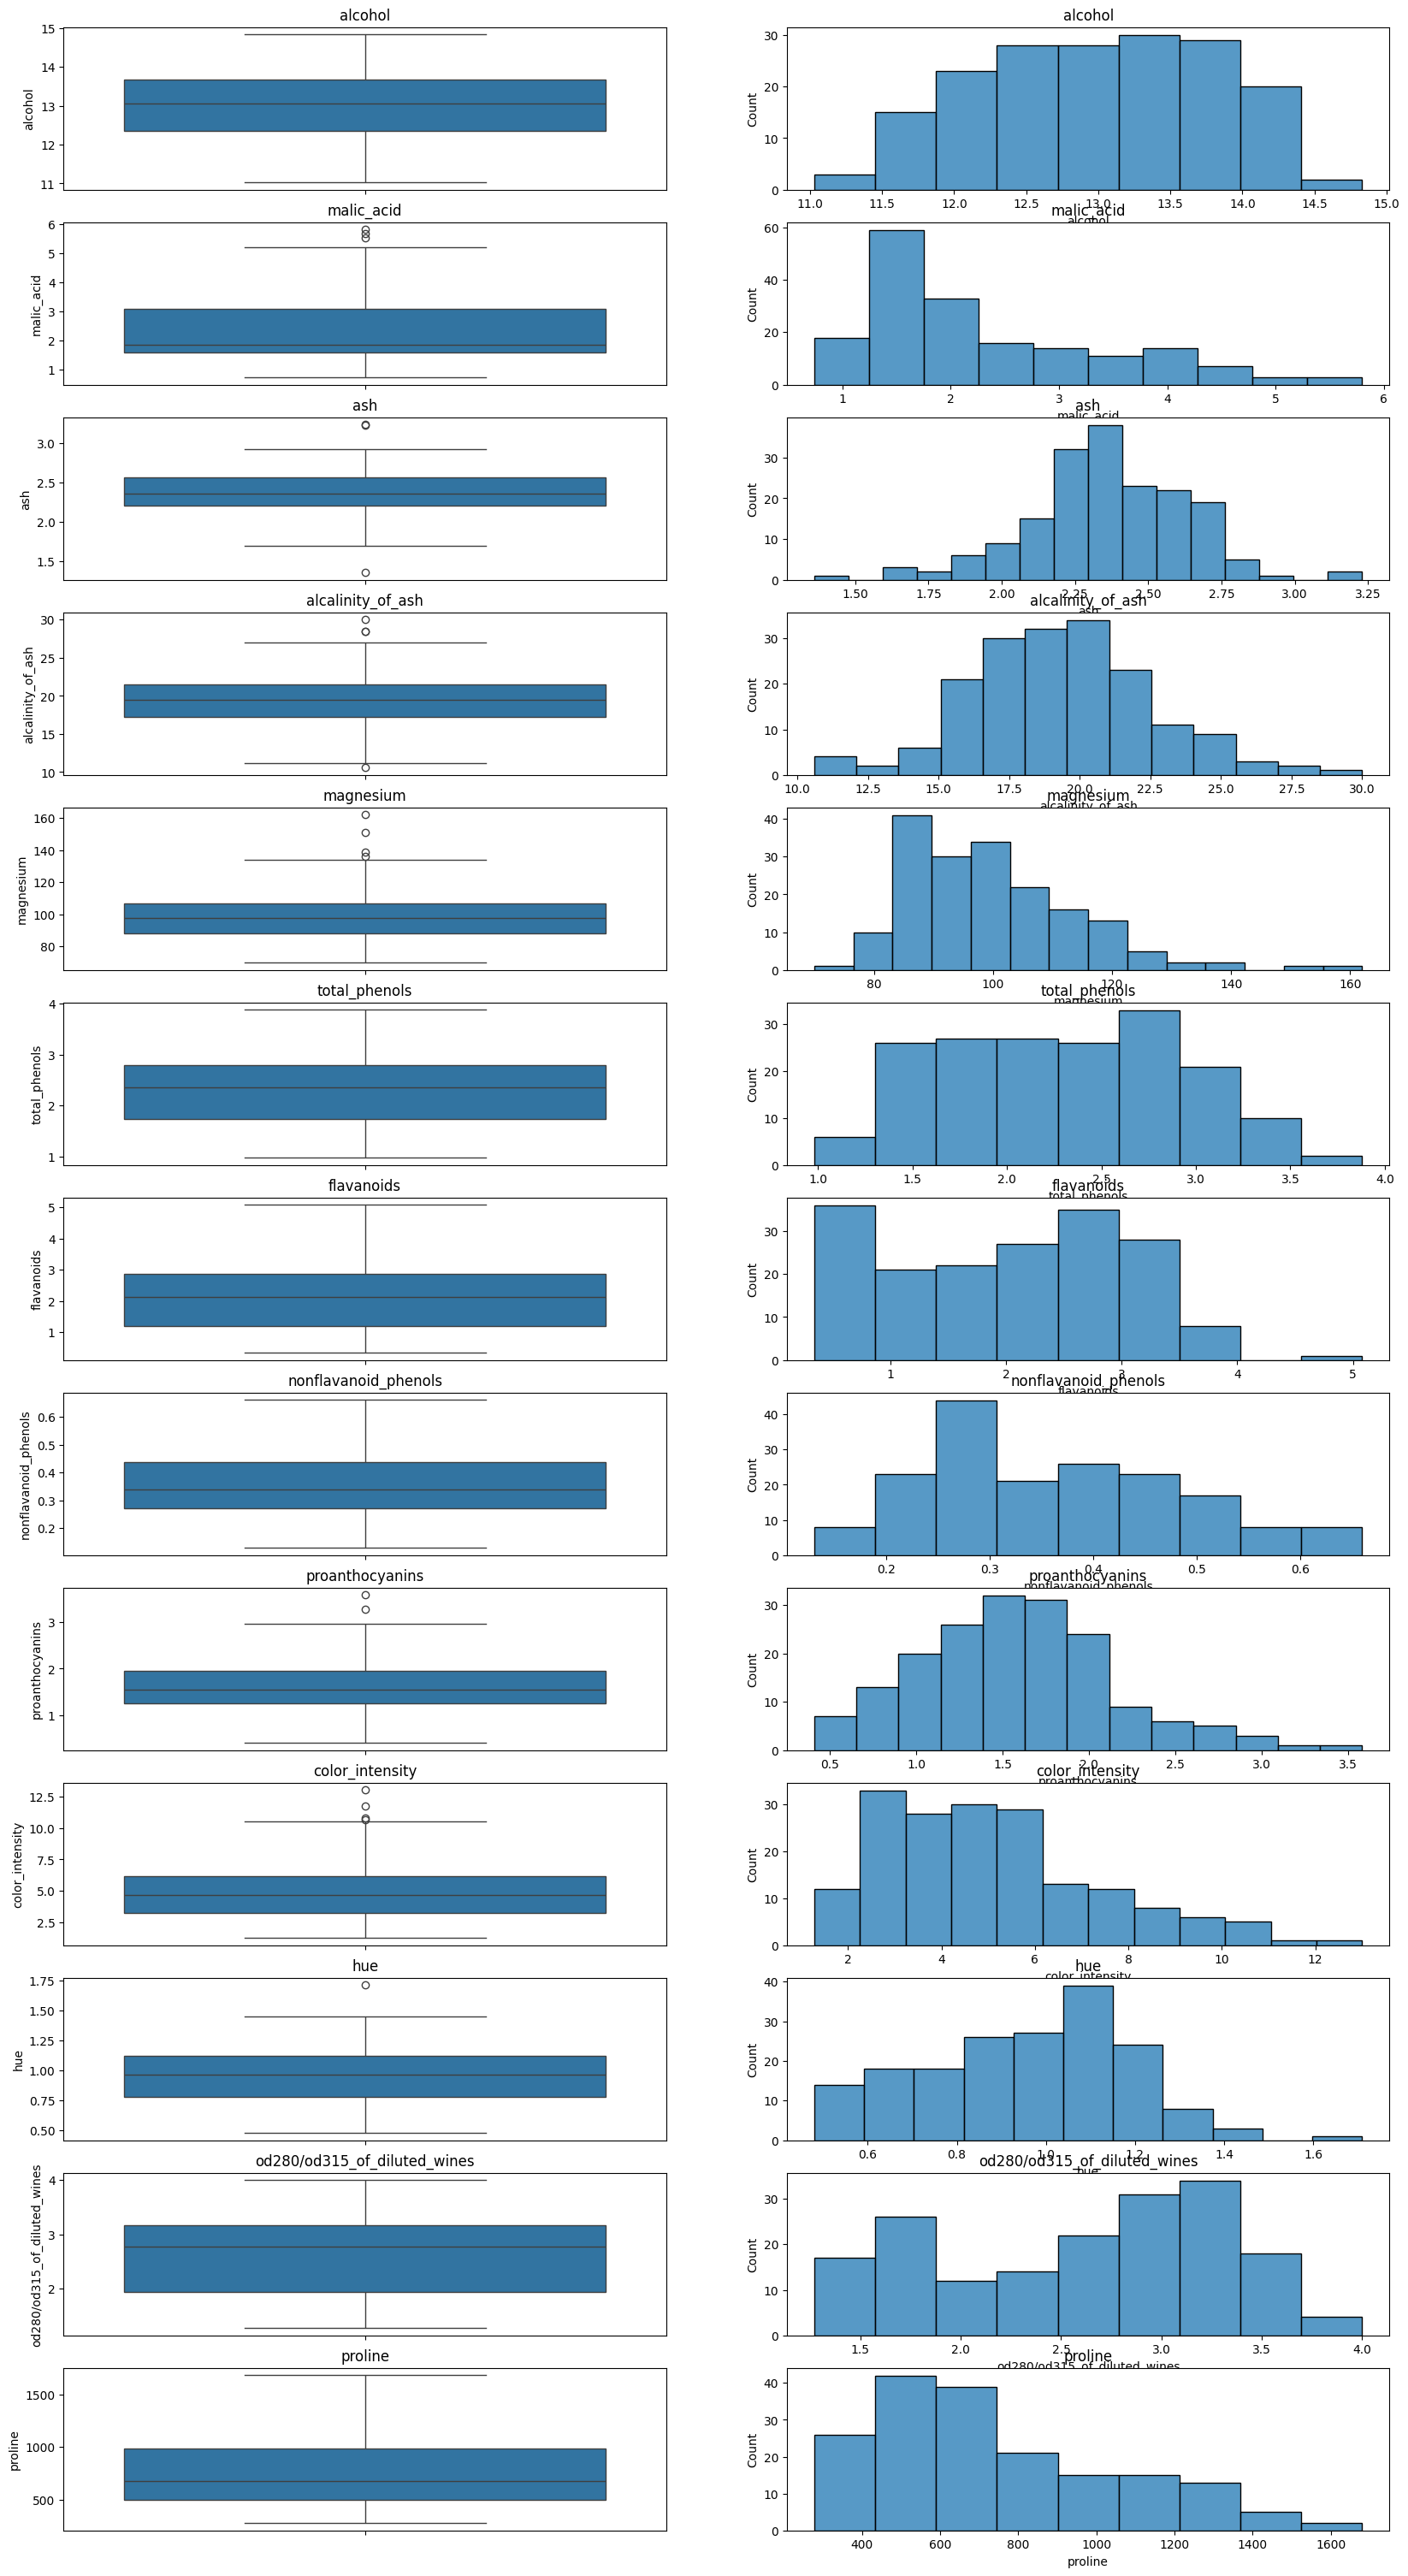

In [140]:
# outliers
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

n_features = len(df.columns)
n_cols = 2  

fig, axs = plt.subplots(nrows=n_features, ncols=n_cols, figsize=(20, 38))

for i, col in enumerate(df.columns):
    sns.boxplot(data=df, y=col, ax=axs[i,0])
    axs[i,0].set_title(col)
    sns.histplot(data=df, x=col, ax=axs[i,1])
    axs[i,1].set_title(col)

# plt.tight_layout() 
plt.show()



>> 4. Univariate analysis
   - Numerical variables: Distribution, Mean vs Median, Skewness and heavy tails
   - Categorical variables: cardinality, **dominant classes**, rare categories
  ! Normalization, Transformation (log), Category Grouping

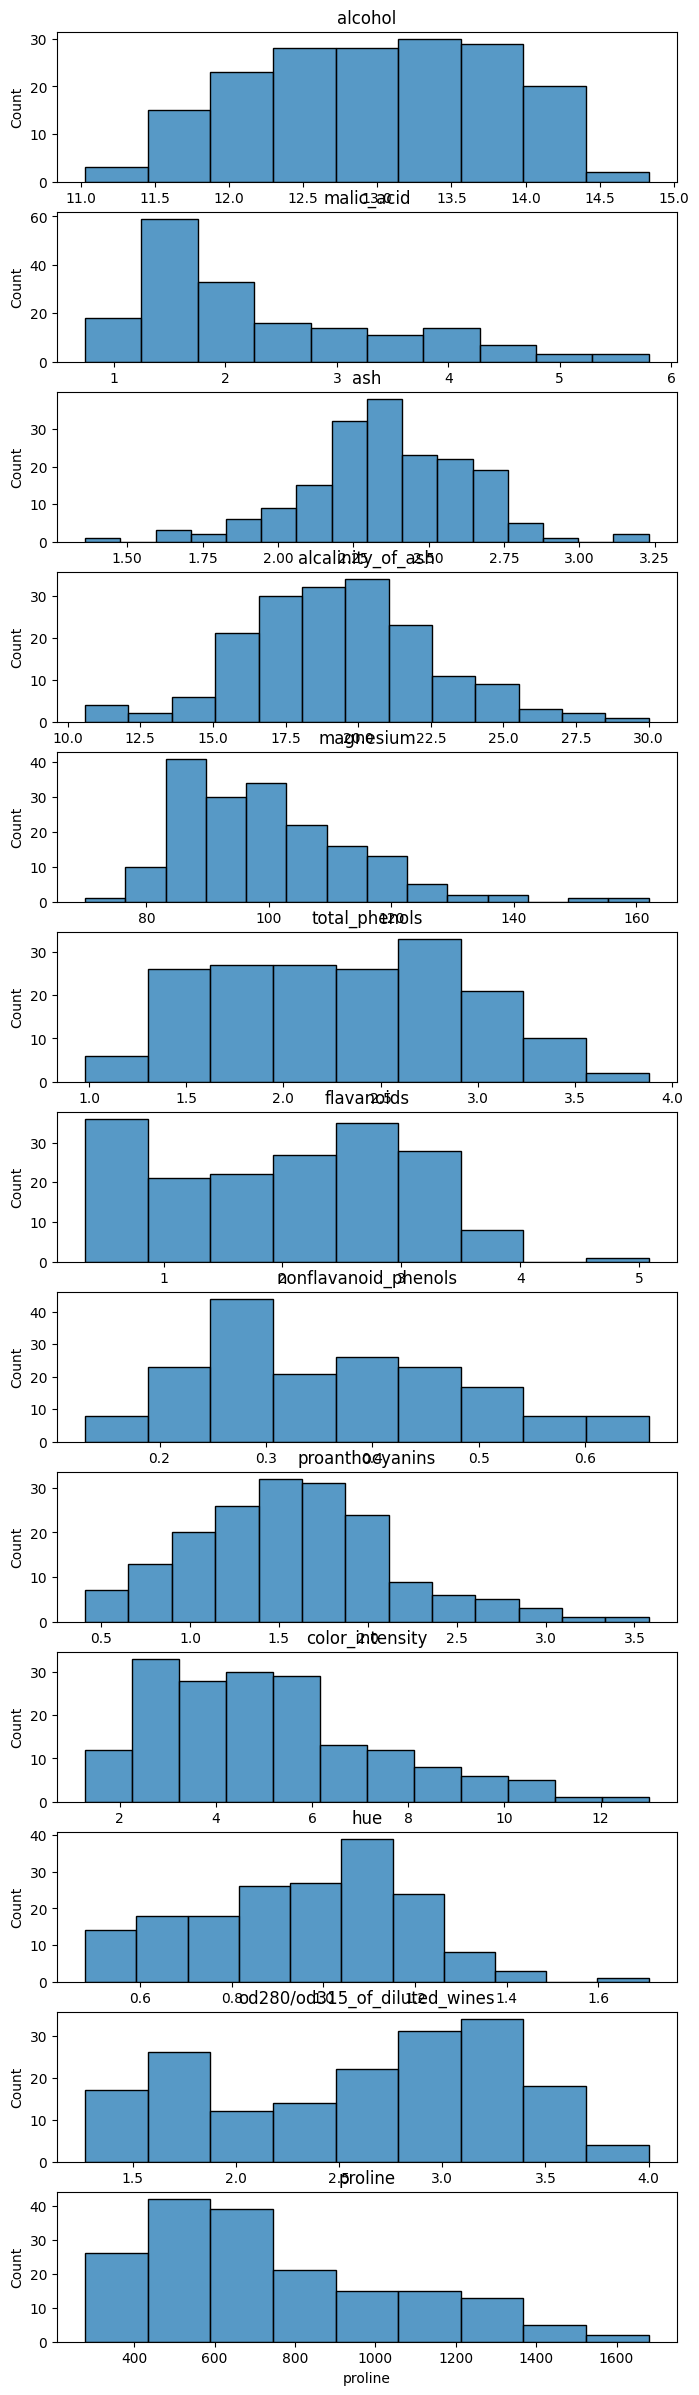

In [141]:
## Getting the distribution of the numerical variables

fig, axs = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(8, 30))

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=axs[i])
    axs[i].set_title(col)
plt.show()


## NORMALIZATION? 




In [142]:
import scipy.stats as stats
## normalization of features 
# Z-score
# Log
# Min-max
# Robust
# Quantile
# Power
# Box-cox

# Z-score (recommended)
df_norm = (df - df.mean()) / df.std()

# Log
df_log = np.log(df)

# Min-max (recommended)
df_minmax = (df - df.min()) / (df.max() - df.min())

# Robust
df_robust = (df - df.median()) / (df.quantile(0.75) - df.quantile(0.25))

# Quantile
df_quantile = (df - df.quantile(0.25)) / (df.quantile(0.75) - df.quantile(0.25))

# Power
df_power = np.power(df, 0.5)

# Box-cox
# df_boxcox = pd.Series(stats.boxcox(df)) # Error:Data must be 1-dimensional.


normalized_dfs = [df_norm, df_log, df_minmax, df_robust, df_quantile, df_power]
normalized_dfs_names = ["Z-score", "Log", "Min-max", "Robust", "Quantile", "Power"]


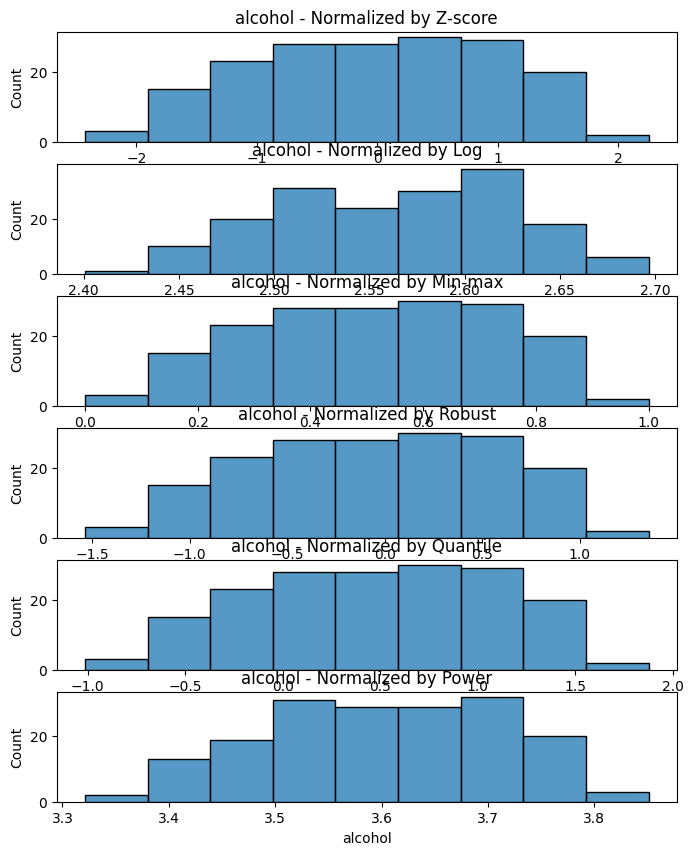

In [143]:
ixcolumns = 0
label = df.columns[ixcolumns]

fig, axs = plt.subplots(nrows=len(normalized_dfs), ncols=1, figsize=(8, 10))

for i, df in enumerate(normalized_dfs):
    sns.histplot(df.iloc[:, ixcolumns], ax=axs[i])
    axs[i].set_title(f"{label} - Normalized by {normalized_dfs_names[i]}")
plt.show()

>> 5. Bivariate analysis
   - **Target variable** and relationships
     - Correlation != Causation
     - Non-linear relationships
   - Exploration with PCA: Analisis de Componentes Principales / Principal Component Analysis
  !Feature selection, linear vs non-linear models

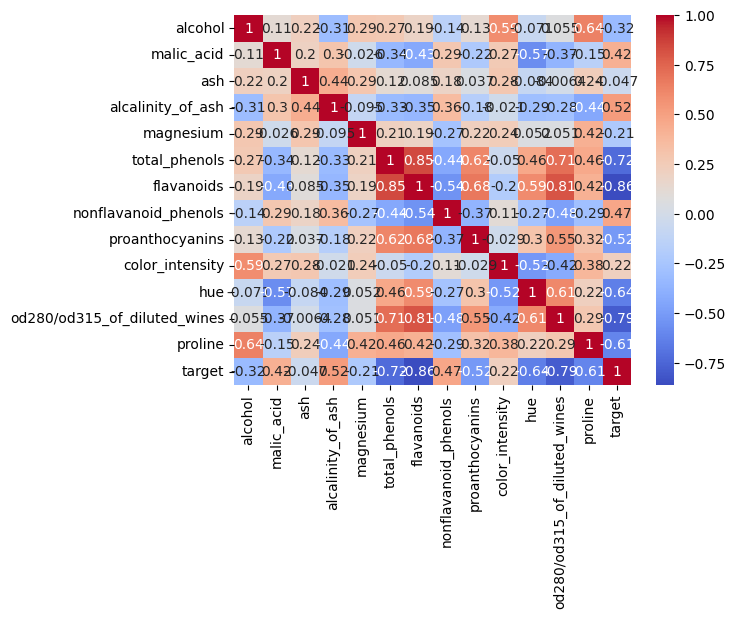

In [144]:
# Correlation matrix with target variable
df["target"] = data.target 
df_corr = df.corrwith(df.target)

# Correlation matrix
df_corr = df.corr()

# Heatmap
sns.heatmap(df_corr, annot=True, cmap="coolwarm")
plt.show()


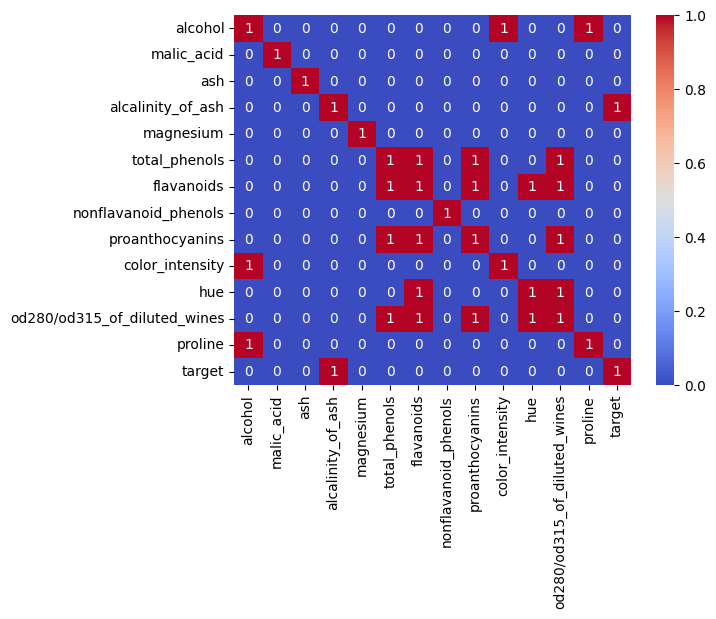

In [145]:
# filter some values
df_corr = df.corr()>0.5

# Heatmap
sns.heatmap(df_corr, annot=True, cmap="coolwarm")
plt.show()

Correlations : 
    - total_phenols -- flavanoids ?
    - color intensity -- Target   ?

## Wine dataset PCA

In [146]:
# Standardization 
from sklearn.preprocessing import StandardScaler

X = pd.DataFrame(data.data, columns=data.feature_names) # reload the original data...

scaler = StandardScaler() # equiv. Z-score
X = scaler.fit_transform(X) # each feature has mean 0 and std 1
print(X)

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


In [147]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X)

# PCA()                  > mismas dimensiones               
# PCA(n_components=k)    > k dimensiones                    
# PCA(n_components=0.95) > las necesarias para 95% varianza 


In [148]:
dir(pca) # PCA - https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_n_features_out',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_transform',

In [149]:
X_pca.shape
# Samples and ranked of PCA componentes (variance of each dimension)

(178, 13)

In [150]:
X_pca[:3,:4] #firs, second, third, fourth component

array([[ 3.31675081,  1.44346263, -0.16573904, -0.21563119],
       [ 2.20946492, -0.33339289, -2.02645737, -0.29135832],
       [ 2.51674015,  1.0311513 ,  0.98281867,  0.72490231]])

## First PCA level

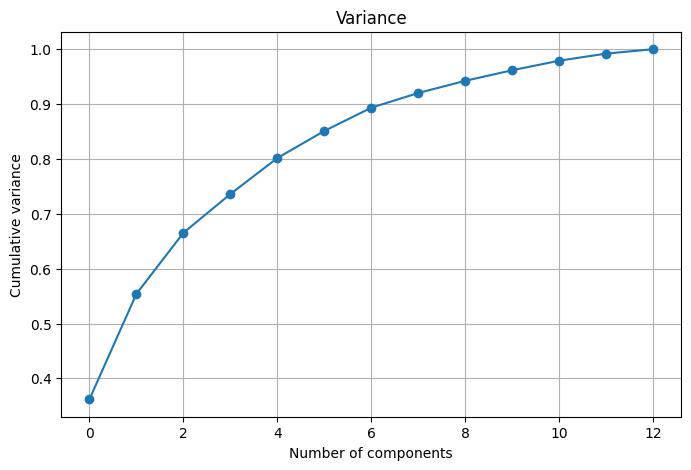

In [151]:
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker="o")
plt.xlabel("Number of components")
plt.ylabel("Cumulative variance")
plt.title("Variance")
plt.grid(True)
plt.show()

With two components > 60%
With 4: al 80%!
With 6: al 90%!

De 13 features a 6!

## Second PCA level

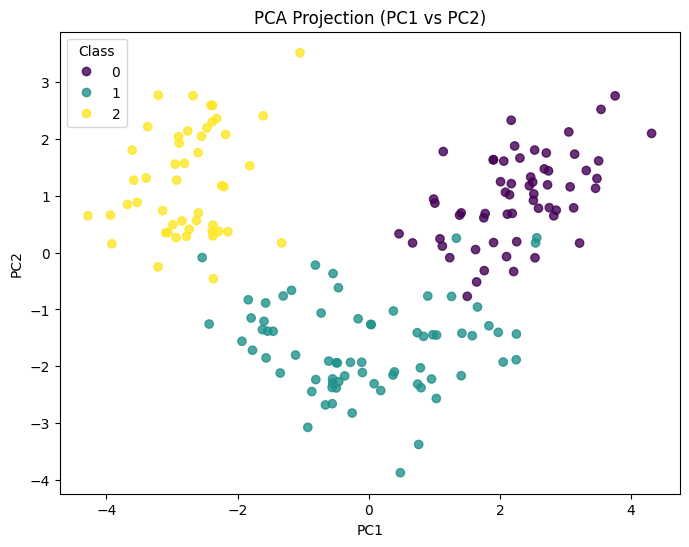

In [152]:
y = data.target

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_pca[:, 0], # first component vs second component
    X_pca[:, 1],
    c=y, # and vs target variable
    cmap="viridis",
    alpha=0.8
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection (PC1 vs PC2)")
plt.legend(*scatter.legend_elements(), title="Class")
plt.show()

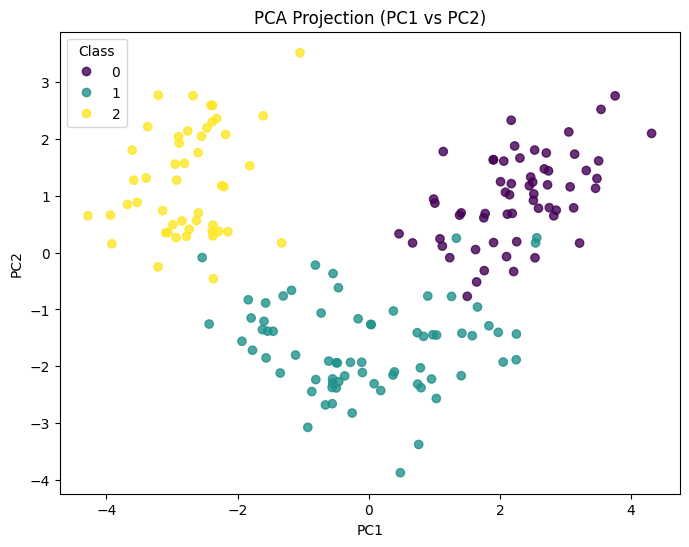

In [153]:
y = data.target
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=y,
    cmap="viridis",
    alpha=0.8
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection (PC1 vs PC2)")
plt.legend(*scatter.legend_elements(), title="Class")
plt.show()

Clear Cluster structure, partialtly separable

! ML the classification process will be feasible 


In [154]:
loadings = pd.DataFrame(
    pca.components_.T, # global variance of each feature
    columns=[f"PC{i+1}" for i in range(len(data.feature_names))],
    index=data.feature_names
)

loadings[["PC1", "PC2"]]

,PC1,PC2
alcohol,0.144329,0.483652
malic_acid,-0.245188,0.224931
ash,-0.002051,0.316069
alcalinity_of_ash,-0.239320,-0.010591
magnesium,0.141992,0.299634
total_phenols,0.394661,0.065040
flavanoids,0.422934,-0.003360
nonflavanoid_phenols,-0.298533,0.028779
proanthocyanins,0.313429,0.039302
color_intensity,-0.088617,0.529996


On PC1:
- flavanoids,
- total_phenols
- od280/od315_of_diluted_wines
...

On PC2:
- color_intensity
- alcohol
- ...

High values > high importance

**Descartamos el resto para un proceso de ML ????**
- Casos con escassa presencia: Fraude?
- PCA reduce la dimensionalidad, ¿tenemos restricciones de Rendimiento o Coste en el proceso?
- 

# Feature selection

# Mutual Information (MI)

Measure the dependency between feature and target

References:
- https://en.wikipedia.org/wiki/Mutual_information

In [155]:
from sklearn.feature_selection import mutual_info_classif

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

mi = mutual_info_classif(X, y)

mi_df = pd.DataFrame(mi, index=X.columns, columns=["MI"])
mi_df.sort_values(by="MI", ascending=False)
# Feature Selection

,MI
flavanoids,0.670055
proline,0.570032
color_intensity,0.549578
od280/od315_of_diluted_wines,0.514834
alcohol,0.474615
hue,0.456392
total_phenols,0.421502
malic_acid,0.281953
proanthocyanins,0.280699
alcalinity_of_ash,0.238055


## Random Forest or Gradient Boosting

Calculan la importancia basada en la reducción de *impurezas*

In [156]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X, y)
importances = rf.feature_importances_

importances_df = pd.DataFrame(importances, index=X.columns, columns=["Importance"])
importances_df.sort_values(by="Importance", ascending=False)

# Feature Selection

,Importance
flavanoids,0.180653
proline,0.173181
color_intensity,0.147060
alcohol,0.119712
od280/od315_of_diluted_wines,0.110292
hue,0.069343
total_phenols,0.048907
alcalinity_of_ash,0.040064
magnesium,0.032207
malic_acid,0.031503


# Activity:
Dataset: Breast Cancer
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [157]:
from sklearn.datasets import load_breast_cancer
data_breast_cancer = load_breast_cancer()

print(data_breast_cancer.DESCR)

X = pd.DataFrame(data_breast_cancer.data, columns=data_breast_cancer.feature_names)
y = data_breast_cancer.target

# EDA
# PCA
# Feature Selection
# ML


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 